In [1]:
import tensorflow as tf
import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Hyperparams if GPU is available
if tf.test.is_gpu_available():
    BATCH_SIZE = 512  # Number of examples used in each iteration
    EPOCHS = 5  # Number of passes through entire dataset
    MAX_LEN = 75  # Max length of review (in words)
    EMBEDDING = 40  # Dimension of word embedding vector

    
# Hyperparams for CPU training
else:
    BATCH_SIZE = 32
    EPOCHS = 5
    MAX_LEN = 75
    EMBEDDING = 20

In [3]:
data = pd.read_csv("ner_dataset_altered.csv", encoding='latin1')

In [ ]:
data.head()

In [ ]:
data.shape

In [4]:
data = data.fillna(method='ffill')

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.columns

In [ ]:
#data[data['Word']=='at']

In [ ]:
listOfSeries = [pd.Series(['Sentence: 47960','Dr','NNP','B-prov'],index=data.columns),
                pd.Series(['Sentence: 47960','Gregory','NNP','I-prov'],index=data.columns),
                pd.Series(['Sentence: 47960','M','NNP','I-prov'],index=data.columns),
                pd.Series(['Sentence: 47960','Cowan','NNP','I-prov'],index=data.columns),
                pd.Series(['Sentence: 47960','is','VBZ','O'],index=data.columns),
                pd.Series(['Sentence: 47960','an','DT','O'],index=data.columns),
                pd.Series(['Sentence: 47960','Immunologist','NN','B-spec'],index=data.columns),
                pd.Series(['Sentence: 47960','at ','IN','O'],index=data.columns),
                pd.Series(['Sentence: 47960','Fortis','NNP','B-org'],index=data.columns),
                pd.Series(['Sentence: 47960','Hospital','NNP','I-org'],index=data.columns),
                pd.Series(['Sentence: 47961','Dr','NNP','B-prov'],index=data.columns),
                pd.Series(['Sentence: 47961','Debra','NNP','I-prov'],index=data.columns),
                pd.Series(['Sentence: 47961','H','NNP','I-prov'],index=data.columns),
                pd.Series(['Sentence: 47961','Mescher','NNP','I-prov'],index=data.columns),
                pd.Series(['Sentence: 47961','is','VBZ','O'],index=data.columns),
                pd.Series(['Sentence: 47961','an ','DT','O'],index=data.columns),
                pd.Series(['Sentence: 47961','Internist','NN','B-spec'],index=data.columns),
                pd.Series(['Sentence: 47962','Jordan','NNP','B-prov'],index=data.columns),
                pd.Series(['Sentence: 47962','A','NNP','I-prov'],index=data.columns),
                pd.Series(['Sentence: 47962','Sennett','NNP','I-prov'],index=data.columns),
                pd.Series(['Sentence: 47962','is','VBZ','O'],index=data.columns),
                pd.Series(['Sentence: 47962','an','DT','O'],index=data.columns),
                pd.Series(['Sentence: 47962','Endocrinologist','NN','B-spec'],index=data.columns)
                ]

In [ ]:
# Pass a list of series to the append() to add multiple rows
data = data.append(listOfSeries , ignore_index=True)

In [ ]:
data.tail(25)

In [5]:
data['Sentence #'].unique()

array(['Sentence: 1', 'Sentence: 2', 'Sentence: 3', ...,
       'Sentence: 47957', 'Sentence: 47958', 'Sentence: 47959'],
      dtype=object)

In [ ]:
print(data.groupby(['Sentence #']))
print("Number of sentences: ", len(data.groupby(['Sentence #'])))

In [6]:
words = list(set(data['Word'].values))
n_words = len(words)
print("Number of unique words in the dataset: ", n_words)
print("Number of total words in the dataset: ", len(list(data['Word'].values)))

Number of unique words in the dataset:  35178
Number of total words in the dataset:  1048575


In [7]:
tags = list(set(data['Tag'].values))
n_tags = len(tags)
print(tags)
print("Number of tags in the dataset: ", n_tags)

['I-geo', 'I-tim', 'B-geo', 'B-tim', 'O', 'B-gpe', 'B-eve', 'B-per', 'B-art', 'I-gpe', 'B-nat', 'I-eve', 'B-org', 'I-nat', 'B-prov', 'I-art', 'I-org', 'I-prov']
Number of tags in the dataset:  18


In [8]:
agg_func = lambda s:[(w,p,t) for w,p,t in zip(s["Word"].values.tolist(), s["POS"].values.tolist(), s["Tag"].values.tolist())]

In [9]:
for i in zip(data["Word"].values.tolist(), data["POS"].values.tolist(), data["Tag"].values.tolist()):
    print(i)    
    if i[0] == 'marched':
        assert False

('Thousands', 'NNS', 'O')
('of', 'IN', 'O')
('demonstrators', 'NNS', 'O')
('have', 'VBP', 'O')
('marched', 'VBN', 'O')


AssertionError: 

In [10]:
class SentenceGetter(object):
    """
    Class to get sentence in format : [(Token, PartOfSpeech,Tag),()]
    """
    def __init__(self,data):
        """
        data : pandas dataframe
        """
        self.n_sent = 1
        self.data = data
        self.empty = False
        
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
        print(len(self.sentences))
        print(self.sentences[-1])
        
    def get_next(self):
        """Return One Sentence"""
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None
    

In [11]:
getter = SentenceGetter(data)

47959
[('The', 'DT', 'O'), ('United', 'NNP', 'B-org'), ('Nations', 'NNP', 'I-org'), ('is', 'VBZ', 'O'), ('praising', 'VBG', 'O'), ('the', 'DT', 'O'), ('use', 'NN', 'O'), ('of', 'IN', 'O'), ('military', 'JJ', 'O'), ('helicopters', 'NNS', 'O'), ('to', 'TO', 'O'), ('drop', 'VB', 'O'), ('food', 'NN', 'O'), ('and', 'CC', 'O'), ('rescue', 'NN', 'O'), ('survivors', 'NNS', 'O'), ('in', 'IN', 'O'), ('tsunami-ravaged', 'JJ', 'B-tim'), ('Indonesia', 'NNP', 'I-tim'), (',', ',', 'O'), ('saying', 'VBG', 'O'), ('the', 'DT', 'O'), ('aircraft', 'NN', 'O'), ('are', 'VBP', 'O'), ('"', '``', 'O'), ('worth', 'IN', 'O'), ('their', 'PRP$', 'O'), ('weight', 'NN', 'O'), ('in', 'IN', 'O'), ('gold', 'NN', 'O'), ('.', '.', 'O'), ('"', '``', 'O')]


In [ ]:
print(type(getter))

In [12]:
sent = getter.get_next()

In [13]:
print('This is what a sentence looks like:')
print(sent)

This is what a sentence looks like:
[('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O'), ('war', 'NN', 'O'), ('in', 'IN', 'O'), ('Iraq', 'NNP', 'B-geo'), ('and', 'CC', 'O'), ('demand', 'VB', 'O'), ('the', 'DT', 'O'), ('withdrawal', 'NN', 'O'), ('of', 'IN', 'O'), ('British', 'JJ', 'B-gpe'), ('troops', 'NNS', 'O'), ('from', 'IN', 'O'), ('that', 'DT', 'O'), ('country', 'NN', 'O'), ('.', '.', 'O')]


In [14]:
# Get all the sentences
sentences = getter.sentences
print(len(sentences))

47959


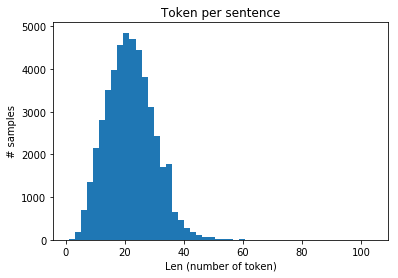

In [15]:
# Plot sentence by lenght
plt.hist([len(s) for s in sentences], bins=50)
plt.title('Token per sentence')
plt.xlabel('Len (number of token)')
plt.ylabel('# samples')
plt.show()

In [16]:
# Vocabulary Key:word --> Value:token_index
# The first 2 entries are reserved for PAD and UNK
word2idx = {w:i+2 for i,w in enumerate(words)}

In [17]:
word2idx['UNK'] = 1 # Unknown words
word2idx['PAD'] = 0 # Padding

In [ ]:
print(word2idx['of'])
print(word2idx['through'])
print(word2idx['George'])
print(word2idx['Endocrinologist'])
print(word2idx['andy'])

In [18]:
# Vocabulary Key:token_index  --> Value:word
idx2word = {i:w for w,i in word2idx.items()}

In [ ]:
print(idx2word[0])
print(idx2word[1])
print(idx2word[2])

In [19]:
# Vocabulary Key:Label/Tag --> Value:tag_index
# The first entry is reserved for PAD
tag2idx = {t: i+1 for i,t in enumerate(tags)}
tag2idx["PAD"] = 0 

In [20]:
# Vocabulary Key:tag_index --> Value:Label/Tag
idx2tag = {i:w for w,i in tag2idx.items()}

In [ ]:
print(tag2idx)

In [ ]:
print(idx2tag)

In [ ]:
print("The word Obama is identified by the index: {}".format(word2idx["Obama"]))

In [ ]:
print("The labels B-geo(which defines Geopraphical Enitities) is identified by the index: {}".format(tag2idx["B-geo"]))

In [ ]:
print("The labels B-prov(which defines Providers) is identified by the index: {}".format(tag2idx["B-prov"]))

In [21]:
from keras.preprocessing.sequence import pad_sequences

In [22]:
# Convert each sentence from list of tokens to list of word index
X = [[word2idx[w[0]] for w in s] for s in sentences]

In [ ]:
print(len(X))
print(len(sentences))

In [23]:
# Padding each sentence to have the same length
X = pad_sequences(maxlen=MAX_LEN, sequences=X, padding='post', value=word2idx["PAD"])

In [24]:
# Convert Tag/Label to tag_index
y = [[tag2idx[w[2]] for w in s] for s in sentences]
# Padding each sentence to have the same length
y = pad_sequences(maxlen=MAX_LEN, sequences=y, padding="post", value=tag2idx["PAD"])

In [25]:
from keras.utils import to_categorical

In [26]:
# One Hot encode
y = [to_categorical(y=i, num_classes=n_tags+1) for i in y] # n_tags+1(PAD)

In [ ]:
print(y[0][0])
print(len(y[0][0]))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[0] + X_test.shape[0])
print(np.array(y_train).shape)
print(np.array(y_test).shape)
print(np.array(y_train).shape[0] + np.array(y_test).shape[0])

In [ ]:
w0 = ' '.join([w[0] for w in sentences[0]])
print('Raw Sample: ')
print(w0)
print(len(w0))
print('\n')
print('After processing, sample:')
print(X[0])
print(len(X[0]))
print('\n')
for i in X[0]:
    print(i, idx2word[i])
print('\n')

In [ ]:
w2 = ' '.join([w[2] for w in sentences[0]])
ws2 = [w[2] for w in sentences[0]]
print('Raw Label: ')
print(w2)
print(ws2)
print(len(ws2))
print(type(ws2))
print('\n')
print('After processing, labels:')
print(len(y[0]))
for i in range(len(ws2)):
    print(ws2[i],y[0][i])
    
print(y[0])


In [ ]:
# Install extra-dependencies
! pip -q install git+https://www.github.com/keras-team/keras-contrib.git sklearn-crfsuite

In [28]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras_contrib.layers import CRF

# Model definition
input = Input(shape=(MAX_LEN,))
model = Embedding(input_dim=n_words+2, output_dim=EMBEDDING, # n_words + 2 (PAD & UNK)  
                  input_length=MAX_LEN, mask_zero=True)(input)  # default: 20-dim embedding
model = Bidirectional(LSTM(units=50, return_sequences=True,
                           recurrent_dropout=0.1))(model)  # variational biLSTM
model = TimeDistributed(Dense(50, activation="relu"))(model)  # a dense layer as suggested by neuralNer
crf = CRF(n_tags+1)  # CRF layer, n_tags+1(PAD)
out = crf(model)  # output

model = Model(input, out)
model.compile(optimizer="rmsprop", loss=crf.loss_function, metrics=[crf.accuracy])

model.summary()

/home/ikscare/anaconda3/envs/py36/lib/python3.6/site-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/home/ikscare/anaconda3/envs/py36/lib/python3.6/site-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 75)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 75, 20)            703600    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 75, 100)           28400     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 75, 50)            5050      
_________________________________________________________________
crf_1 (CRF)                  (None, 75, 19)            1368      
Total params: 738,418
Trainable params: 738,418
Non-trainable params: 0
_________________________________________________________________


In [ ]:
out

Note: Accuracy isn't the best metric to choose for evaluating this type of task because most of the time it will correctly predict 'O' or 'PAD' without identifing the important Tags, which are the ones we are interested in. So after training for some epochs, we can monitor the precision, recall and f1-score for each of the Tags.

In [29]:
history = model.fit(X_train, np.array(y_train), batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_split=0.1, verbose=2)

Train on 38846 samples, validate on 4317 samples
Epoch 1/5
 - 169s - loss: 9.2662 - crf_viterbi_accuracy: 0.9027 - val_loss: 9.1399 - val_crf_viterbi_accuracy: 0.9453
Epoch 2/5
 - 164s - loss: 9.0332 - crf_viterbi_accuracy: 0.9562 - val_loss: 9.0880 - val_crf_viterbi_accuracy: 0.9607
Epoch 3/5
 - 165s - loss: 9.0015 - crf_viterbi_accuracy: 0.9655 - val_loss: 9.0729 - val_crf_viterbi_accuracy: 0.9647
Epoch 4/5
 - 165s - loss: 8.9900 - crf_viterbi_accuracy: 0.9687 - val_loss: 9.0682 - val_crf_viterbi_accuracy: 0.9656
Epoch 5/5
 - 164s - loss: 8.9838 - crf_viterbi_accuracy: 0.9707 - val_loss: 9.0676 - val_crf_viterbi_accuracy: 0.9659


In [ ]:
# Eval
pred_cat = model.predict(X_test)
pred = np.argmax(pred_cat, axis=-1)
y_test_true = np.argmax(y_test, -1)

In [ ]:
from sklearn_crfsuite.metrics import flat_classification_report

# Convert the index to tag
pred_tag = [[idx2tag[i] for i in row] for row in pred]
y_test_true_tag = [[idx2tag[i] for i in row] for row in y_test_true] 

report = flat_classification_report(y_pred=pred_tag, y_true=y_test_true_tag)
print(report)

In [ ]:
i = np.random.randint(0,X_test.shape[0]) # choose a random number between 0 and len(X_te)
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
true = np.argmax(y_test[i], -1)

print("Sample number {} of {} (Test Set)".format(i, X_test.shape[0]))
# Visualization
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_test[i], true, p[0]):
    if w != 0:
        print("{:15}: {:5} {}".format(words[w-2], idx2tag[t], idx2tag[pred]))

In [ ]:
!pip install ipywidgets

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
from ipywidgets import interact_manual
from ipywidgets import widgets

In [ ]:
import re
import string

# Custom Tokenizer
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')

def tokenize(s): 
    return re_tok.sub(r' \1 ', s).split()

In [ ]:
def get_prediction(sentence):
    test_sentence = tokenize(sentence) # Tokenization
    # Preprocessing
    x_test_sent = pad_sequences(sequences=[[word2idx.get(w, 0) for w in test_sentence]],
                            padding="post", value=word2idx["PAD"], maxlen=MAX_LEN)
    # Evaluation
    p = model.predict(np.array([x_test_sent[0]]))
    p = np.argmax(p, axis=-1)
    # Visualization
    print("{:15}||{}".format("Word", "Prediction"))
    print(30 * "=")
    for w, pred in zip(test_sentence, p[0]):
        print("{:15}: {:5}".format(w, idx2tag[pred]))

In [ ]:
interact_manual(get_prediction, sentence=widgets.Textarea(placeholder='Type your sentence here'))

In [ ]:
get_prediction("Obama was the president of USA.")

In [ ]:
get_prediction("The 1906 San Francisco earthquake was the biggest earthquake that has ever hit San Francisco on April 18, 1906")

In [ ]:
get_prediction("Next Monday is Christmas!")

In [ ]:
get_prediction("al Qaeda is a terrorist organization")

In [ ]:
get_prediction("President Nasser presided over the audience")

In [ ]:
get_prediction("John Smith works at the United Nations every Saturday")

In [ ]:
get_prediction("Andy Garcia works at the United Nations every Saturday")

In [ ]:
get_prediction("Gregory M Cowan is an Immunologist at Fortis Hospital")

In [ ]:
get_prediction("Debra H Mescher is an Internist")

In [ ]:
get_prediction('Nikola Gruevski Khin Nyunt Smith works at the United Nations every Saturday')

In [ ]:
get_prediction('David Richards was a great man')

In [ ]:
str = ("Colonoscopy Sigmoidoscopy Large Bowel Polyps Diverticulitis Crohn Gastritis Enteroscopy Colon Endoscope "
"Patient Name :  Pamela Woodard "
"DOB : 11/09/1996 " 
"Date : 21/10/18 "
"Order orders Appointment Schedule Requesting Provider Physician Prescriber Surgery Clearance Medical clearance Supply Supplies "
"Christian Chu  MD "
"WeServeEveryone Clinic")

get_prediction(str)